In [13]:
!pip install scipy
!pip install sounddevice

     ---------------------------------------- 0.0/199.7 kB ? eta -:--:--
     --------------------- ---------------- 112.6/199.7 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 199.7/199.7 kB 3.1 MB/s eta 0:00:00


Capturando señal en tiempo real. Presiona Ctrl+C para detener.


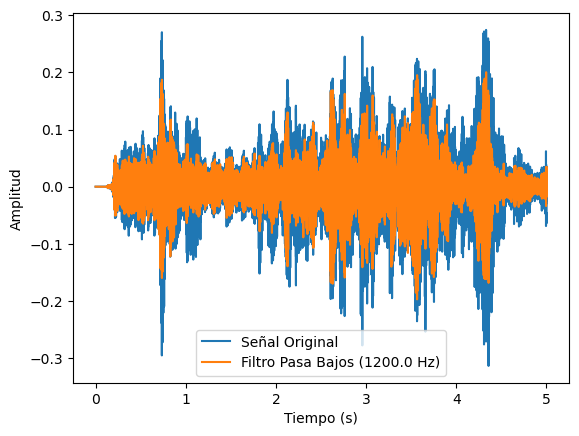

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import sounddevice as sd

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Cargar datos desde el archivo
archivo = 'tu_archivo.csv'  # Reemplaza con el nombre de tu archivo
datos = pd.read_csv(archivo, delimiter=';')

# Obtener tiempo, ángulo del DataFrame
tiempo = datos['tiempo']  # Asegúrate de que los nombres de las columnas coincidan con tu archivo
angulo = datos['angulo']


# Parámetros del filtro
cutoff_frequency = 1200.0  # Frecuencia de corte en Hz
order = 6  # Orden del filtro

# Configuración de la señal en tiempo real
fs = 44100  # Frecuencia de muestreo en Hz
duration = 5  # Duración en segundos

# Captura de la señal en tiempo real
print("Capturando señal en tiempo real. Presiona Ctrl+C para detener.")
try:
    input_data = sd.rec(int(fs * duration), samplerate=fs, channels=1, dtype=np.float32)
    sd.wait()
except KeyboardInterrupt:
    print("Captura detenida.")

# Filtrar la señal en tiempo real
filtered_data = butter_lowpass_filter(input_data[:, 0], cutoff_frequency, fs, order)

# Visualización de la señal original y filtrada
time = np.arange(0, duration, 1/fs)
plt.plot(time, input_data[:, 0], label='Señal Original')
plt.plot(time, filtered_data, label=f'Filtro Pasa Bajos ({cutoff_frequency} Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()
